In [54]:
import csv
import mne
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
file_dir = "C:\\Users\\Marc\\Desktop\\artefact_annotations\\eeg2.edf" 
#1


file = mne.io.read_raw_edf(file_dir, preload=True)

Extracting EDF parameters from C:\Users\Marc\Desktop\artefact_annotations\eeg2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 962815  =      0.000 ...  3760.996 secs...


In [83]:
data = file.filter(0.1, 100) # use filter on data
data = data.notch_filter(50) # use filter on data

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8449 samples (33.004 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition ba

In [84]:
data.info['sfreq']

256.0

In [85]:
df = data.to_data_frame()

In [86]:
for i in df.columns:
    print(i)

time
EEG Fp1-Ref
EEG Fp2-Ref
EEG F3-Ref
EEG F4-Ref
EEG F7-Ref
EEG F8-Ref
EEG Fz-Ref
EEG C3-Ref
EEG C4-Ref
EEG Cz-Ref
EEG T3-Ref
EEG T5-Ref
EEG T4-Ref
EEG T6-Ref
EEG P3-Ref
EEG P4-Ref
EEG Pz-Ref
EEG O1-Ref
EEG O2-Ref
ECG EKG
Resp Effort


In [120]:
list1 = df["EEG Fp2-Ref"] # get the first series
list2 = df["EEG F4-Ref"] # get the second series
df_new = list1 - list2
df_new = pd.DataFrame(df_new.rename("F3-C3"))

In [121]:
import numpy as np

In [122]:
target = np.array([0 for _ in range(len(df_new))])

In [123]:
target[(20)*256:(27*60 + 20)*256] = 1
target[(60*12 + 20)*256:(60*12 + 20 + 5*60)*256] = 1
target[(20*60 + 39)*256:(20*60 + 39 + 2*60)*256] = 1

#target[(18*20 + 3)*256:(18*20 + 3 + 88*60)*256] = 1

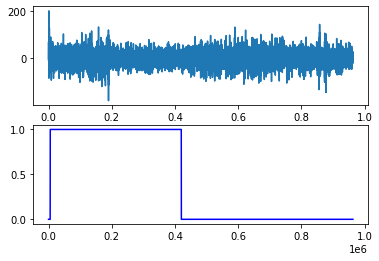

In [124]:
figure, axis = plt.subplots(2, 1)
axis[0].plot(df_new)
axis[1].plot(target, "b")